In [1]:
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt


files_name = ['Accidents0514.csv', 'Casualties0514.csv', 'Vehicles0514.csv' ]
files_path = './data/'

files = [f'{files_path}{name}'for name in files_name]
files

['./data/Accidents0514.csv',
 './data/Casualties0514.csv',
 './data/Vehicles0514.csv']

In [2]:
df_acc = pd.read_csv(files[0], index_col=0, dtype={'LSOA_of_Accident_Location': str})
df_cas = pd.read_csv(files[1], index_col=0).drop('Vehicle_Reference', axis=1)
df_veh = pd.read_csv(files[2], index_col=0).drop('Vehicle_Reference', axis=1)

In [4]:
df = df_acc.join(df_cas, lsuffix='_Cas', how='inner').join(df_veh, lsuffix='_Veh', how='inner')

In [5]:
df.shape

(4287593, 64)

In [6]:
df.to_csv(f'{files_path}complete.csv')

In [7]:
df.to_pickle(f'{files_path}complete_pickled.pkl')

In [25]:
nan_values = df.isna().sum()
nan_values = nan_values[nan_values > 0].sort_values(ascending=False)

In [62]:
nan_values

LSOA_of_Accident_Location    282711
Time                            264
Location_Easting_OSGR           256
Location_Northing_OSGR          256
Longitude                       256
Latitude                        256
dtype: int64

In [33]:
f'{nan_values.shape[0]}/{df.shape[1]} columns have nan values'

'6/64 columns have nan values'

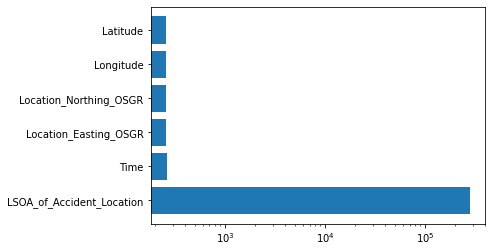

In [30]:
plt.barh(nan_values.index, nan_values, log=True)
plt.show()

In [46]:
# always 256
df[df['Latitude'].isna() & df['Longitude'].isna() & df['Location_Easting_OSGR'].isna() & df['Location_Northing_OSGR'].isna()]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200504AL05063,NaN,NaN,NaN,NaN,4,2,2,2,09/09/2005,6,...,1,15,1,35,6,-1,-1,-1,8,3
200504AL05063,NaN,NaN,NaN,NaN,4,2,2,2,09/09/2005,6,...,1,15,2,71,10,-1,-1,-1,8,3
200504AL05063,NaN,NaN,NaN,NaN,4,2,2,2,09/09/2005,6,...,1,15,1,35,6,-1,-1,-1,8,3
200504AL05063,NaN,NaN,NaN,NaN,4,2,2,2,09/09/2005,6,...,1,15,2,71,10,-1,-1,-1,8,3
200504AL05082,NaN,NaN,NaN,NaN,4,3,2,1,08/10/2005,7,...,1,15,3,-1,-1,1998,2,2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008950004890,NaN,NaN,NaN,NaN,95,3,2,3,06/05/2008,3,...,1,15,1,20,4,1242,1,10,-1,1
2008950004890,NaN,NaN,NaN,NaN,95,3,2,3,06/05/2008,3,...,1,15,1,37,7,1905,2,12,-1,1
2008950005704,NaN,NaN,NaN,NaN,95,3,2,1,09/05/2008,6,...,1,15,2,52,8,-1,-1,-1,-1,1


In [71]:
df['Time'] = df['Time'].map(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]) if type(x) == str else x)

In [82]:
df['Time'] = df['Time'].fillna(df['Time'].mean())

In [95]:
df['Date'] = df['Date'].map(lambda x: pd.to_datetime(x, infer_datetime_format=True ).timestamp())

In [98]:
df.to_csv(f'{files_path}preprocessed.csv')
df.to_pickle(f'{files_path}preprocessed_pickled.pkl')

In [2]:
df = pd.read_pickle(f'{files_path}preprocessed_pickled.pkl')

In [5]:
df[['Latitude', 'Longitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR']].corr()

,Latitude,Longitude,Location_Easting_OSGR,Location_Northing_OSGR
Latitude,1.000000,-0.403330,-0.393208,0.999972
Longitude,-0.403330,1.000000,0.999379,-0.401404
Location_Easting_OSGR,-0.393208,0.999379,1.000000,-0.391185
Location_Northing_OSGR,0.999972,-0.401404,-0.391185,1.000000


In [3]:
df = df.drop(['Latitude', 'Longitude', 'LSOA_of_Accident_Location'], axis=1)

In [4]:
df['Location_Easting_OSGR'] = df['Location_Easting_OSGR'].fillna(df['Location_Easting_OSGR'].mean())
df['Location_Northing_OSGR'] = df['Location_Northing_OSGR'].fillna(df['Location_Northing_OSGR'].mean())

In [11]:
df['Local_Authority_(Highway)'] = pd.factorize(df['Local_Authority_(Highway)'])[0]

In [12]:
x, y = df.drop('Accident_Severity', axis=1),  df['Accident_Severity']
x, y

(                Location_Easting_OSGR  Location_Northing_OSGR  Police_Force  \
 Accident_Index                                                                
 200501BS00001                525680.0                178240.0             1   
 200501BS00002                524170.0                181650.0             1   
 200501BS00003                524520.0                182240.0             1   
 200501BS00003                524520.0                182240.0             1   
 200501BS00004                526900.0                177530.0             1   
 ...                               ...                     ...           ...   
 2014984138414                323869.0                566853.0            98   
 2014984139614                314072.0                579971.0            98   
 2014984139614                314072.0                579971.0            98   
 2014984139614                314072.0                579971.0            98   
 2014984139614                314072.0  

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

r = dt.fit(x.iloc[:3_000_000, :], y.iloc[:3_000_000])

In [19]:
r.score(x.iloc[:3_000_000 , :], y.iloc[:3_000_000])

1.0

In [20]:
r.score(x.iloc[3_000_000: , :], y.iloc[3_000_000:])

0.8604559049326922

In [21]:
df.to_csv(f'{files_path}preprocessed.csv')
df.to_pickle(f'{files_path}preprocessed_pickled.pkl')